# importing

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import f_classif
from numpy.ma.extras import median
from sklearn.impute import SimpleImputer as Imputer

In [13]:
# https://drive.google.com/file/d/1SnpMvRRAXwZs_LHWeprA0bv_LJlqgyQx/view?usp=share_link
train_df = pd.read_csv('https://docs.google.com/uc?export=download&id=1SnpMvRRAXwZs_LHWeprA0bv_LJlqgyQx&export=download', header = 0) 
train_df.drop(columns = 'Unnamed: 0', inplace = True)

# https://drive.google.com/file/d/1hE7Ph-jnW8ovTS35n-ufi9PGpdSX3JGr/view?usp=share_link
test_df = pd.read_csv('https://docs.google.com/uc?export=download&id=1hE7Ph-jnW8ovTS35n-ufi9PGpdSX3JGr&export=download', header = 0) 
test_df.drop(columns = 'Unnamed: 0', inplace = True)

train_df.head()
# test_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# clean data set

In [14]:
# need to check to see if there are any null values so we can impute using median strategy
print(train_df.isnull().any())

SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool


In [15]:
num_cols = ['MonthlyIncome', 'NumberOfDependents']
imp_median = Imputer(strategy='median')  # Initialize imputer
imp_median.fit(train_df[num_cols])  # "fit" the imputer to the data to learn the mode of each column

# Apply the imputer to your data according to the strategy it was "fit" with
train_df[num_cols] = imp_median.transform(train_df[num_cols])

In [16]:
print(train_df.isnull().any())

SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                      False
dtype: bool


In [17]:
X_train = train_df.drop(columns=['SeriousDlqin2yrs'])
y_train = train_df.loc[:,'SeriousDlqin2yrs']

# X_train
# y_train

# correlations

correlations ------------------------------------- 
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfDependents                      0.046869
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberRealEstateLoansOrLines           -0.007038
DebtRatio                              -0.007602
MonthlyIncome                          -0.017151
NumberOfOpenCreditLinesAndLoans        -0.029669
age                                    -0.115386
Name: SeriousDlqin2yrs, dtype: float64


absolute correlations ---------------------------- 
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
age                                     0.115386
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfDependents                      0.046869
NumberOfOpenCreditLinesAndLoans         0.029669
MonthlyIncome                           0.017151
DebtRatio             

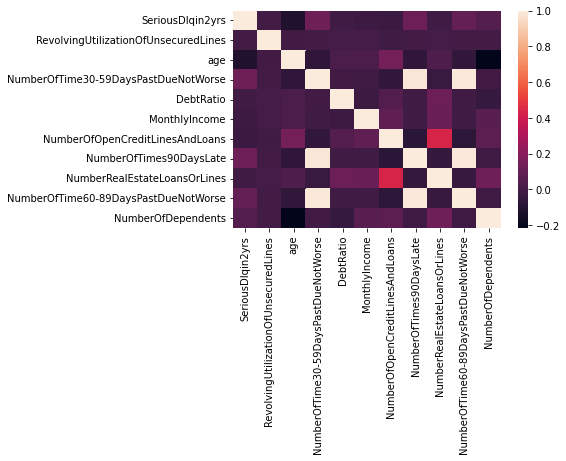

In [18]:
correlations = train_df.corr()

# correlations
corr = correlations["SeriousDlqin2yrs"].sort_values(ascending=False).drop(['SeriousDlqin2yrs'])
print(f'correlations ------------------------------------- \n{corr}\n\n')

# absolute correlations
abs_corr = corr.abs().sort_values(ascending = False)
print(f'absolute correlations ---------------------------- \n{abs_corr}\n\n')

sns.heatmap(correlations)
plt.show()

The top 3 features that have the highest absolute correlation with the probability of loan default is 

1.   NumberOfTime30-59DaysPastDueNotWorse
2.   NumberOfTimes90DaysLate
3.   age



# feature engineering

In [19]:
# create a list of F-values for the existing features
feature_F_scores, _ = f_classif(X_train, y_train)

print('------2 FEATURES MULTIPLIED-------------------------------------------------------------------------------\n')
# iterate through each combination of features
for f1_index, f1 in enumerate(X_train.columns):
  for f2_index, f2 in enumerate(X_train.columns[f1_index + 1:]):
    # multiply the two features to create a new feature
    new_feature = X_train[[f1]].multiply(X_train[f2], axis=0)
    # evaluate F-value of new feature
    F_Score_new, p_value_new = f_classif(new_feature, y_train)
    # evaluate the relative improvement of the new feature
    F_score_improvement = F_Score_new[0] / max(feature_F_scores[[f1_index, f2_index]])
    # print out features that is sufficiently improved 
    if F_score_improvement >= 1.5 and F_Score_new[0] >= 75 and p_value_new < 0.05: # arbitrary values except for p-value
        print(f'{f1} + {f2} has an F-score of {F_Score_new[0]}')
        print(f'\tBetter by a factor of {F_score_improvement} over features in isolation')
        print(f'\tThe result is significant (p = {p_value_new})\n')

print('------3 FEATURES MULTIPLIED-------------------------------------------------------------------------------\n')
for f1_index, f1 in enumerate(X_train.columns):
  for f2_index, f2 in enumerate(X_train.columns[f1_index + 1:]):
    for f3_index, f3 in enumerate(X_train.columns[f2_index + 1:]):
    # multiply the two features to create a new feature
      new_feature = (X_train[[f1]].multiply(X_train[f2], axis=0)).multiply(X_train[f3], axis=0)
      # evaluate F-value of new feature
      F_Score_new, p_value_new = f_classif(new_feature, y_train)
      # evaluate the relative improvement of the new feature
      F_score_improvement = F_Score_new[0] / max(feature_F_scores[[f1_index, f2_index, f3_index]])
      # print out features that is sufficiently improved 
      if F_score_improvement >= 1.5 and F_Score_new[0] >= 75 and p_value_new < 0.05: # arbitrary values except for p-value
          print(f'{f1} + {f2} + {f3} has an F-score of {F_Score_new[0]}')
          print(f'\tBetter by a factor of {F_score_improvement} over features in isolation')
          print(f'\tThe result is significant (p = {p_value_new})\n')

------2 FEATURES MULTIPLIED-------------------------------------------------------------------------------

RevolvingUtilizationOfUnsecuredLines + NumberOfTime60-89DaysPastDueNotWorse has an F-score of 104.11287740772094
	Better by a factor of 14.011498519568718 over features in isolation
	The result is significant (p = [1.94661675e-24])

NumberOfTime30-59DaysPastDueNotWorse + NumberOfOpenCreditLinesAndLoans has an F-score of 6651.549210138066
	Better by a factor of 2.767221293185945 over features in isolation
	The result is significant (p = [0.])

DebtRatio + NumberOfTime60-89DaysPastDueNotWorse has an F-score of 957.1746157777818
	Better by a factor of 21.68756984075747 over features in isolation
	The result is significant (p = [1.67842587e-209])

MonthlyIncome + NumberOfTime60-89DaysPastDueNotWorse has an F-score of 1190.98340513594
	Better by a factor of 26.985186769793575 over features in isolation
	The result is significant (p = [5.8599346e-260])

NumberOfOpenCreditLinesAndLoans 

**2 features** <br> 
*1.* NumberRealEstateLoansOrLines + NumberOfTime60-89DaysPastDueNotWorse has an 
F-score of 2823.7038012835555 <br>
Better by a factor of 380.0137179615693 over features in isolation <br> <br>

**3 features** <br> 
*1.* NumberRealEstateLoansOrLines + NumberOfTime60-89DaysPastDueNotWorse + age has an F-score of 2308.768409791662 <br>
Better by a factor of 310.7137749073862 over features in isolation <br> <br>
*2.* RevolvingUtilizationOfUnsecuredLines + NumberOfTime60-89DaysPastDueNotWorse + NumberOfTime60-89DaysPastDueNotWorse has an F-score of 1027.7982232858842 <br>
Better by a factor of 138.32096127349524 over features in isolation <br> <br>
	
*3.* DebtRatio + MonthlyIncome + NumberOfTime60-89DaysPastDueNotWorse has an F-score of 1179.6042478898553 <br>
Better by a factor of 136.06810556552446 over features in isolation



***The most significant interaction effect is between NumberRealStateLoansOrLines and NumberOfTime60-89DaysPastDueNotWorse***

# analysis

## age

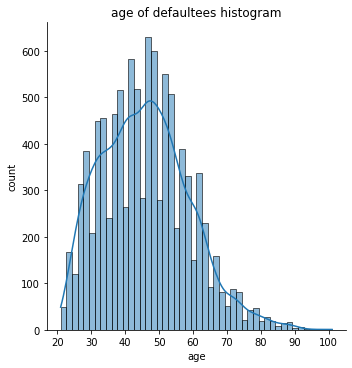

mean age of defaultees: 45.93


In [20]:
train_df[train_df.SeriousDlqin2yrs == 1]

sns.displot(data=train_df[train_df.SeriousDlqin2yrs == 1]['age'], kde=True)

# Format axis labels 
plt.title('age of defaultees histogram')
plt.ylabel('count')
plt.xlabel('age')
plt.show() 

print(f'mean age of defaultees: {train_df[train_df.SeriousDlqin2yrs == 1]["age"].sum()/len(train_df[train_df.SeriousDlqin2yrs == 1]):.2f}')

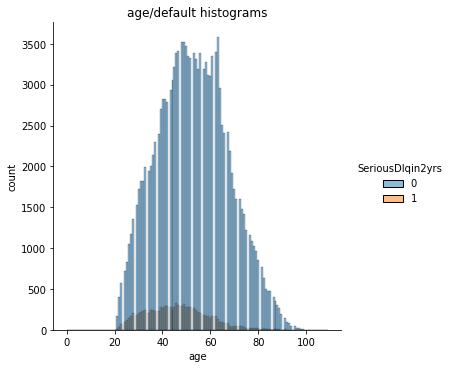

In [21]:
sns.displot(data=train_df,x = 'age', hue = 'SeriousDlqin2yrs', kind='hist')

# Format plot area 
plt.title('age/default histograms')
plt.ylabel('count')
plt.xlabel('age')
plt.show()

In [22]:
# find the probability for default for each age then plot it, compare it to the previous graphs because although the mean age for default is 45, 
# since there are so many 45 year olds applying for loans and less <45 year olds, maybe younger people have a greater chance of defaulting

prob_dict = {}

for i in train_df.groupby('age').size().index:
  if (i in train_df[train_df['SeriousDlqin2yrs'] == 1].groupby('age').size().index):
    probability = train_df[train_df['SeriousDlqin2yrs'] == 1].groupby('age').size()[i] / train_df.groupby('age').size()[i]
    prob_dict[i] = probability
  else: 
    prob_dict[i] = 0

probs = pd.Series(prob_dict)
probs = probs.sort_values(ascending = False)
probs = probs.to_dict()
print(probs)




{101: 0.3333333333333333, 99: 0.2222222222222222, 28: 0.13141025641025642, 25: 0.12696747114375656, 27: 0.12406576980568013, 26: 0.12321877619446772, 24: 0.12009803921568628, 32: 0.11365853658536586, 33: 0.10987047789191604, 23: 0.10920436817472699, 30: 0.10789881259679918, 35: 0.10730186999109528, 31: 0.10647693817468105, 29: 0.10517038777908343, 36: 0.09962168978562422, 34: 0.09744779582366589, 41: 0.09417040358744394, 42: 0.09377027903958468, 39: 0.0937395379979913, 37: 0.09004363347877826, 38: 0.08931965032307107, 46: 0.08723747980613894, 43: 0.08603491271820449, 40: 0.08535402521823472, 22: 0.08294930875576037, 47: 0.08228018284485077, 49: 0.08157414646859526, 45: 0.08109651627641348, 52: 0.07675256303685231, 51: 0.07526881720430108, 48: 0.07514450867052024, 50: 0.07434052757793765, 44: 0.0734669095324833, 53: 0.07236842105263158, 21: 0.07103825136612021, 54: 0.06852007862959843, 55: 0.06440281030444965, 56: 0.05767623293396489, 57: 0.05422222222222222, 59: 0.05091463414634146, 61

Besides ages 101 and 99 which I believe are outliers, in general, the percentage of defaulting by age decreases as age increases.